#The efficient framework and algorithm for provisioning evolving VDC
#in federated data centers

**Code Implementation:** Manasa.M(212IS015) and HaimashreeLakshmi(212IS010)


**Title:** Virtual Node Embedding on substrate Network

**Course:**Virtualization and Cloud Computing-CS728
**Semester:**2nd sem MTech

**Unziping alib file**

In [ ]:
!unzip alib.zip

Archive:  alib.zip
replace alib/cli.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: alib/cli.md             
replace alib/cli.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

**Installing the requirements**

In [ ]:
!pip install gurobipy
!pip install Unidecode

**Reading input from pickle file and generating Substrate Network**

In [ ]:
#readpickle.py
import pickle
import matplotlib.pyplot as plt
with open('input.pickle', 'rb') as handle:
    b = pickle.load(handle)

sn_graph=b.get("substrate")
nodes_sn_graph=sn_graph.nodes
print(nodes_sn_graph)

SN_node_CRB=sn_graph.node_weights
SN_edge_BW=sn_graph.edge_weights
print(SN_node_CRB)
print(SN_edge_BW)
SN_edge_BW[('74', '78')]=40000
SN_edge_BW[('78', '74')]=40000


84
{0: 20384, 1: 127021, 2: 297374, 3: 140702, 4: 142586, 5: 359681, 6: 497295, 7: 233929, 8: 241931, 9: 159035, 10: 19151, 11: 466085, 12: 262973, 13: 432188, 14: 138003, 15: 375071, 16: 252534, 17: 322366, 18: 31042, 19: 468912, 20: 482582, 21: 78815, 22: 491010, 23: 218352, 24: 384703, 25: 98538, 26: 287869, 27: 104521, 28: 136565, 29: 283402, 30: 172827, 31: 336842, 32: 275990, 33: 436229, 34: 170474, 35: 72262, 36: 74810, 37: 382571, 38: 158420, 39: 354635, 40: 179284, 41: 141108, 42: 81267, 43: 373266, 44: 29542, 45: 266320, 46: 349271, 47: 40954, 48: 65226, 49: 464017, 50: 102288, 51: 483997, 52: 351462, 53: 416087, 54: 92170, 55: 53122, 56: 30219, 57: 176897, 58: 224640, 59: 434396, 60: 224371, 61: 74570, 62: 202438, 63: 55437, 64: 187814, 65: 203546, 66: 220189, 67: 105240, 68: 452043, 69: 165759, 70: 179369, 71: 143018, 72: 264898, 73: 494291, 74: 174341, 75: 293951, 76: 433841, 77: 428990, 78: 89543, 79: 13010, 80: 341075, 81: 16852, 82: 119812, 83: 398323}
{('22', '18'): 35

**Virtual Network Embedding Request 
Generation**

Virtual Network Embedding Request Generated 
 [{1: [3, 7, 8, 9], 2: [3, 4, 6, 8], 3: [1, 2, 4, 7, 8, 9], 4: [2, 3, 5, 6], 5: [4, 6, 9], 6: [2, 4, 5, 7], 7: [1, 3, 6], 8: [1, 2, 3], 9: [1, 3, 5]}, {1: [3, 5], 2: [4], 3: [4, 1], 4: [3, 2], 5: [1]}]


Physical Resource Request by virtual Nodes
{1: 36269, 2: 39953, 3: 43786, 4: 30093, 5: 32438, 6: 20133, 7: 30768, 8: 13538, 9: 42201}


Physical Resource Request by virtual Nodes
{1: 40896, 2: 35534, 3: 48565, 4: 44856, 5: 11456, 6: 20133, 7: 30768, 8: 13538, 9: 42201}


Bandwidth Requirement by virtual Nodes
{('1', '3'): 32365, ('3', '1'): 32365, ('5', '1'): 20566, ('1', '5'): 20566, ('2', '4'): 34019, ('4', '2'): 34019, ('3', '4'): 26148, ('4', '3'): 26148}


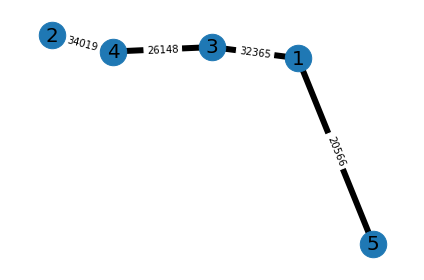

In [ ]:
#create vne
import networkx as nx
import matplotlib.pyplot as plt
import random
import graph
from graph import Parameters
import numpy as np
from random import randint
from random import randrange
res = dict()
edges_start_zero=set()
new_vne_req = []
edge_weight1=dict()
req1=list()
g1 = nx.Graph()
def create_vne(min_nodes=2, max_nodes=10, no_requests=2, probability=0.4):
    random_node_list_arr = np.random.uniform(min_nodes, max_nodes, no_requests)
    random_node_list = [int(i) for i in random_node_list_arr]
    new_vne_req = []
    for req in random_node_list:
        G = nx.erdos_renyi_graph(req, probability, directed=False)
        
        ng = nx.to_dict_of_lists(G)
        g = {}
        for i in ng:
            g[i + 1] = []
            for j in ng[i]:
                g[i + 1].append(j + 1)

        if not nx.is_connected(G):
            null_node_list = [key for key, val in g.items() if not val]
            graph_node_count = {_key: len(_val) for _key, _val in g.items()}
            sorted_dict_list = sorted(
                graph_node_count.items(), key=lambda x: x[1], reverse=True
            )
            if len(null_node_list) != len(g):
                for index, empty_node in enumerate(null_node_list):
                    g[sorted_dict_list[index][0]].append(empty_node)
                    g[empty_node].append(sorted_dict_list[index][0])
            else:
                for i in range(len(g)):
                    for j in range(len(g) - i - 1):
                        if null_node_list[j + 1] not in g[null_node_list[j]]:
                            g[null_node_list[j]].append(null_node_list[j + 1])
                        if null_node_list[j] not in g[null_node_list[j + 1]]:
                            g[null_node_list[j + 1]].append(null_node_list[j])
        new_vne_req.append(g)

    print("Virtual Network Embedding Request Generated","\n",new_vne_req)
    
    vne = []
    #dict1=new_vne_req[1]
    #print(dict1)
    
    res1=dict()
    #print(len(dict1))
    for j in range(no_requests):
        for i in range(len(new_vne_req[j])): 
            res[i+1] = random.randrange(10000, 50000)
        print("\n")    
        print("Physical Resource Request by virtual Nodes")      
        print(res)
   
    for i in range(len(new_vne_req)):
        edges = set()
       
        nodes = len(new_vne_req[i])
    
          
       
        for j in range(nodes):
            for k in new_vne_req[i][j + 1]:
                edges.add((str(j+1), str(k - 1+1)))
                #g1.add_edge(str(j+1), str(k - 1+1))
 
                

 
                edges_start_zero.add((str(j), str(k - 1)))
        vne.append(graph.Graph(nodes, edges, Parameters(1, 10, 1, 10, 0, 100, 0, 100, 1, 4)) )  # for vne request BW ,CRB, Location,Delay
    #print (vne)
    s = list(edges)
    for i in range(len(s)):
       req1.append(s[i])#req1 has edges of vne request
     
    #print(s)
    
 
    for a,b in s:
      
      edge_weight1[(a, b)]= random.randrange(10000, 50000)
      g1.add_edge(a,b,weight= edge_weight1[(a, b)])
      edge_weight1[(b, a)] = edge_weight1[(a, b)]
      g1.add_edge(b,a,weight= edge_weight1[(a, b)])
    print("\n")
    print("Bandwidth Requirement by virtual Nodes")  
    print(edge_weight1)
      
    
    return vne
    




if __name__ == "__main__":
    my_vne=create_vne()
    

    pos = nx.spring_layout(g1, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
    nx.draw_networkx_nodes(g1, pos, node_size=700)

# edges
    nx.draw_networkx_edges(g1, pos,  width=6)
   
    nx.draw_networkx_labels(g1, pos, font_size=20, font_family="sans-serif")
# edge weight labels
    edge_labels = nx.get_edge_attributes(g1, "weight")
    nx.draw_networkx_edge_labels(g1, pos, edge_labels)
    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()
    
   

**Function to sort Dictionary **

In [ ]:
def sort_dict_by_value(d, reverse = True):
    return dict(sorted(d.items(), key = lambda x: x[1], reverse = reverse))

In [ ]:
phy=sort_dict_by_value(SN_edge_BW)
print("Sorted order of substrate nodes based on its node weights")
print(phy)

Sorted order of substrate nodes based on its node weights
{('62', '63'): 498936, ('63', '62'): 498936, ('45', '1'): 489729, ('1', '45'): 489729, ('5', '65'): 488848, ('65', '5'): 488848, ('7', '29'): 482750, ('29', '7'): 482750, ('21', '18'): 481683, ('18', '21'): 481683, ('67', '68'): 477088, ('68', '67'): 477088, ('46', '69'): 476575, ('69', '46'): 476575, ('57', '58'): 476229, ('58', '57'): 476229, ('37', '38'): 465714, ('38', '37'): 465714, ('25', '5'): 461732, ('5', '25'): 461732, ('75', '29'): 451768, ('29', '75'): 451768, ('72', '49'): 451558, ('49', '72'): 451558, ('50', '62'): 446373, ('62', '50'): 446373, ('6', '54'): 445722, ('54', '6'): 445722, ('77', '79'): 442834, ('79', '77'): 442834, ('55', '66'): 441368, ('66', '55'): 441368, ('20', '22'): 440743, ('22', '20'): 440743, ('3', '53'): 435746, ('53', '3'): 435746, ('75', '8'): 435392, ('8', '75'): 435392, ('12', '59'): 429867, ('59', '12'): 429867, ('37', '60'): 429673, ('60', '37'): 429673, ('80', '36'): 427775, ('36', '8

**Apply greedy approach to allocate nodes in substrat network**

In [ ]:
#Apply greedy approach to allocate nodes in substrat network
phy=sort_dict_by_value(SN_node_CRB)

print("Sorted order of Pysical network nodes based on its node weights")

print(phy)  

print("\n")
print("Sorted order of Virtual Network nodes based on its node weights")

req=sort_dict_by_value(res)
print("Node","\t","Resources")
for a,b in req.items():
  print(a,"\t",b)


Sorted order of Pysical network nodes based on its node weights
{6: 497295, 73: 494291, 22: 491010, 51: 483997, 20: 482582, 19: 468912, 11: 466085, 49: 464017, 68: 452043, 33: 436229, 59: 434396, 76: 433841, 13: 432188, 77: 428990, 53: 416087, 83: 398323, 24: 384703, 37: 382571, 15: 375071, 43: 373266, 5: 359681, 39: 354635, 52: 351462, 46: 349271, 80: 341075, 31: 336842, 17: 322366, 2: 297374, 75: 293951, 26: 287869, 29: 283402, 32: 275990, 45: 266320, 72: 264898, 12: 262973, 16: 252534, 8: 241931, 7: 233929, 58: 224640, 60: 224371, 66: 220189, 23: 218352, 65: 203546, 62: 202438, 64: 187814, 70: 179369, 40: 179284, 57: 176897, 74: 174341, 30: 172827, 34: 170474, 69: 165759, 9: 159035, 38: 158420, 71: 143018, 4: 142586, 41: 141108, 3: 140702, 14: 138003, 28: 136565, 1: 127021, 82: 119812, 67: 105240, 27: 104521, 50: 102288, 25: 98538, 54: 92170, 78: 89543, 42: 81267, 21: 78815, 36: 74810, 61: 74570, 35: 72262, 48: 65226, 63: 55437, 55: 53122, 47: 40954, 18: 31042, 56: 30219, 44: 29542,

**Allocate all nodes as unvisited in boolean array**

In [ ]:
fill={}
for i in range(0,84):
  fill[i]=False
print(fill)

{0: False, 1: False, 2: False, 3: False, 4: False, 5: False, 6: False, 7: False, 8: False, 9: False, 10: False, 11: False, 12: False, 13: False, 14: False, 15: False, 16: False, 17: False, 18: False, 19: False, 20: False, 21: False, 22: False, 23: False, 24: False, 25: False, 26: False, 27: False, 28: False, 29: False, 30: False, 31: False, 32: False, 33: False, 34: False, 35: False, 36: False, 37: False, 38: False, 39: False, 40: False, 41: False, 42: False, 43: False, 44: False, 45: False, 46: False, 47: False, 48: False, 49: False, 50: False, 51: False, 52: False, 53: False, 54: False, 55: False, 56: False, 57: False, 58: False, 59: False, 60: False, 61: False, 62: False, 63: False, 64: False, 65: False, 66: False, 67: False, 68: False, 69: False, 70: False, 71: False, 72: False, 73: False, 74: False, 75: False, 76: False, 77: False, 78: False, 79: False, 80: False, 81: False, 82: False, 83: False}


**Node allocation in Physical Server**

In [ ]:
ans={}
l=0
for i in req:
    for k in phy:
        while req[i]>phy[k]:
            continue
        if fill[k]==False:
            ans[i]=k
            l=phy[k]
            phy[k]=(phy[k]-req[i])
            fill[k]=True
            break
print("VNE request node","\t","Allocated Node on Physical Network")
for a,b in ans.items():
  print(a,"\t\t\t\t",b)            
print("Physical network node weights after allocation\n")
for a,b in ans.items():
  print("The weight of PN {} is updated from {}-{} to {}\n".format(b,l,res[a],phy[b]))

 
print("Physical Node Embedding status\n")
 
print(fill) 
 



VNE request node 	 Allocated Node on Physical Network
9 				 6
1 				 73
3 				 22
8 				 51
6 				 20
2 				 19
4 				 11
5 				 49
7 				 68
Physical network node weights after allocation

The weight of PN 6 is updated from 452043-49921 to 447374

The weight of PN 73 is updated from 452043-49366 to 444925

The weight of PN 22 is updated from 452043-45523 to 445487

The weight of PN 51 is updated from 452043-39934 to 444063

The weight of PN 20 is updated from 452043-34794 to 447788

The weight of PN 19 is updated from 452043-32637 to 436275

The weight of PN 11 is updated from 452043-28295 to 437790

The weight of PN 49 is updated from 452043-14125 to 449892

The weight of PN 68 is updated from 452043-13002 to 439041

Physical Node Embedding status

{0: False, 1: False, 2: False, 3: False, 4: False, 5: False, 6: True, 7: False, 8: False, 9: False, 10: False, 11: True, 12: False, 13: False, 14: False, 15: False, 16: False, 17: False, 18: False, 19: True, 20: True, 21: False, 22: True,

**Allocating link bandwidth requirements of virtual node requests to physical network**

In [ ]:
import random
import copy
import numpy as np

class Parameters:
    def __init__(
        self,
        lower_edge,
        upper_edge,
        lower_node,
        upper_node,
        lower_x_pos,
        upper_x_pos,
        lower_y_pos,
        upper_y_pos,
        lower_delay,
        upper_delay,
    ) -> None:
        self.lower_edge = lower_edge
        self.uppper_edge = upper_edge
        self.lower_node = lower_node
        self.upper_node = upper_node
        self.upper_x_pos = upper_x_pos
        self.upper_y_pos = upper_y_pos
        self.lower_x_pos = lower_x_pos
        self.lower_y_pos = lower_y_pos
        self.lower_delay = lower_delay
        self.upper_delay = upper_delay


class Graph:
    def __init__(self, nodes, edges, parameters) -> None:
        lower_edge = parameters.lower_edge
        upper_edge = parameters.uppper_edge
        lower_node = parameters.lower_node
        upper_node = parameters.upper_node
        self.nodes = nodes
        self.edges = list(edges)
        self.neighbours = dict()
        self.node_weights = dict() # CRB
        self.edge_weights = dict() # BandWidth
        self.node_pos = dict()
        self.delay = dict()
        self.parameters = parameters
        for a, b in edges:
            self.edge_weights[(a, b)] = int(np.random.uniform(lower_edge, upper_edge))
            self.edge_weights[(b, a)] = self.edge_weights[(a, b)]
            
            self.delay[(a, b)] = int(np.random.uniform(parameters.lower_delay, parameters.upper_delay))
            self.delay[(b, a)] = self.delay[(a, b)]
        #print(self.edge_weights)    
        for i in range(self.nodes):
            self.node_weights[i] = int(np.random.uniform(lower_node, upper_node))
            l = list()
            l.append(int(np.random.uniform(parameters.lower_x_pos, parameters.upper_x_pos)))
            l.append(int(np.random.uniform(parameters.lower_y_pos, parameters.upper_y_pos)))
            self.node_pos[i] = tuple(l)
        for i in range(self.nodes):
            self.neighbours[i] = set()
            for a, b in self.edges:
                if int(a) == i:
                    self.neighbours[i].add(b)

    def findPaths(self, s, d, visited, path, all_paths, weight):
        visited[int(s)] = True
        path.append(s)
        if s == d:
            all_paths.append(path.copy())
        else:
            for i in self.neighbours[int(s)]:
                if visited[int(i)] == False and self.edge_weights[(s, i)] >= weight:
                    self.findPaths(i, d, visited, path, all_paths, weight)

        path.pop()
        visited[int(s)] = False

    def findPathFromSrcToDst(self, s, d, weight):

        all_paths = []
        visited = [False] * (self.nodes)
        path = []
        self.findPaths(s, d, visited, path, all_paths, weight)
        if all_paths == []:
            return []
        else:
            return all_paths[random.randint(0, len(all_paths) - 1)]

    def BFS(self, src, dest, v, pred, dist, weight):
        queue = []
        visited = [False for i in range(v)]
        for i in range(v):
            dist[i] = 1000000
            pred[i] = -1
        visited[int(src)] = True
        dist[int(src)] = 0
        queue.append(src)
        while len(queue) != 0:
            u = queue[0]
            queue.pop(0)
            for i in self.neighbours[int(u)]:
                if visited[int(i)] == False and self.edge_weights[(u, i)] >= weight:
                    visited[int(i)] = True
                    dist[int(i)] = dist[int(u)] + 1
                    pred[int(i)] = u
                    queue.append(i)
                    if i == dest:
                        return True

        return False

    def findShortestPath(self, s, dest, weight):
        v = self.nodes
        pred = [0 for i in range(v)]
        dist = [0 for i in range(v)]
        ls = []
        if self.BFS(s, dest, v, pred, dist, weight) == False:
            return ls
        path = []
        crawl = dest
        crawl = dest
        path.append(crawl)

        while pred[int(crawl)] != -1:
            path.append(pred[int(crawl)])
            crawl = pred[int(crawl)]

        for i in range(len(path) - 1, -1, -1):
            ls.append(path[i])

        return ls
    def printAllPathsUtil(self, u, d, visited, weight, path, all_path):
        # Mark the current node as visited and store in path
        visited[int(u)]= True
        path.append(u)
        # print(f"{u} {d}")
        # print(path)
        # If current vertex is same as destination, then print
        # current path[]
        
        if u==d:
            all_path.append(copy.deepcopy(path))
        else:
            # If current vertex is not destination
            # Recur for all the vertices adjacent to this vertex
            for i in self.neighbours[int(u)]:
                if visited[int(i)] == False and self.edge_weights[(u, i)] >= weight:
                # if visited[int(i)]== False:
                    self.printAllPathsUtil(i, d, visited, weight, path, all_path)
                     
        # Remove current vertex from path[] and mark it as unvisited
        path.pop()
        visited[int(u)]= False
       
  
  
    # Prints all paths from 's' to 'd'
    def printAllPaths(self, s, d, weight):
        visited =[False]*(self.nodes) # Mark all the vertices as not visited 
        path = []   # Create an array to store a path
        all_path = []   # array to store all the paths
        self.printAllPathsUtil(s, d, visited, weight, path, all_path)  # Call the recursive helper function to print all paths
        return all_path


   
  
if __name__ == '__main__':
    
    
    print("Allocating link bandwidth requirements of virtual node requests to physical network")
    
    for z in range(len(ans)):
          o = z+1
          
          while o < len(ans):
             ans1=(str(z),str(o))
             
             o += 1

             if (ans1 in edges_start_zero):
                
                
                c=ans[int(ans1[0])+1]
                d=ans[int(ans1[1])+1]
               
                p=str(int(ans1[0])+1)
                q=str(int(ans1[1])+1)
                
                if ((p, q) in edge_weight1):
                  print("The virtual nodes ",p," and ",q," are connected with bandwidth requirements ",edge_weight1[(p, q)])
                  #print(p,q)
                  #print(edge_weight1[(p, q)] )
                  print("These virtual nodes are allocated to the physical server nodes ",c," and ",d," respectively")
                  print("The shortest path that is possible from ",c," and ",d," which satisfies link bandwidth of the virtual node link is:")
                  res2=sn_graph.findShortestPath(str(c),str(d),edge_weight1[(p, q)] )
                  print(f"res {res2}")
                  if(len(res2)!=0):
                     print("After alloaction of link bandwidth requirement of ",c," and ",d," to shotest path")
                     print("Changes in allocated link bandwidth of physical server:")
                     for i in range(len(res2)-1):
                     
                        if ((res2[i],res2[i+1]) in SN_edge_BW):
                          k=SN_edge_BW[(res2[i],res2[i+1])]
                          SN_edge_BW[(res2[i],res2[i+1])]= SN_edge_BW[(res2[i],res2[i+1])]-edge_weight1[(p, q)]
                          print("(",res2[i],",",res2[i+1],")",":",k,"-",edge_weight1[(p, q)],"=",SN_edge_BW[(res2[i],res2[i+1])])
                  else:
                     print("Link Bandwidth requirement is not satisfied in current node allocation so either we have to migrate or node re-embedding ") 
                     while True: 
                         #val=input("Do you need to reduce bandwidth requirement? \n ")
                         #if (val=="yes"):
                         val1=int(input("Enter reduced link bandwidth :\n"))
                         res3=sn_graph.findShortestPath(str(c),str(d),val1)
                           
                         print("Shortests path  {} ,  length of path : {}".format(res3,len(res3)))
                         if(len(res3)!=0):
                            print("After alloaction of link bandwidth requirement of ",c," and ",d," to shotest path")
                            print("Changes in allocated link bandwidth of physical server:")
                            for i in range(len(res3)-1):
                     
                                if ((res3[i],res3[i+1]) in SN_edge_BW):
                                  k=SN_edge_BW[(res3[i],res3[i+1])]
                                  SN_edge_BW[(res3[i],res3[i+1])]= SN_edge_BW[(res3[i],res3[i+1])]-val1
                                  print("(",res3[i],",",res3[i+1],")",":",k,"-",val1,"=",SN_edge_BW[(res3[i],res3[i+1])])
                            break  
                print("---------------------------------------------------------------------------------" )


    

Allocating link bandwidth requirements of virtual node requests to physical network
The virtual nodes  1  and  9  are connected with bandwidth requirements  38077
These virtual nodes are allocated to the physical server nodes  73  and  6  respectively
The shortest path that is possible from  73  and  6  which satisfies link bandwidth of the virtual node link is:
res ['73', '74', '78', '47', '46', '69', '61', '21', '18', '22', '20', '48', '54', '6']
After alloaction of link bandwidth requirement of  73  and  6  to shotest path
Changes in allocated link bandwidth of physical server:
( 73 , 74 ) : 227515 - 38077 = 189438
( 74 , 78 ) : 40000 - 38077 = 1923
( 78 , 47 ) : 44641 - 38077 = 6564
( 47 , 46 ) : 72244 - 38077 = 34167
( 46 , 69 ) : 476575 - 38077 = 438498
( 69 , 61 ) : 38612 - 38077 = 535
( 61 , 21 ) : 324047 - 38077 = 285970
( 21 , 18 ) : 481683 - 38077 = 443606
( 18 , 22 ) : 355087 - 38077 = 317010
( 22 , 20 ) : 440743 - 38077 = 402666
( 20 , 48 ) : 272386 - 38077 = 234309
( 48 ,

KeyboardInterrupt: ignored